# First Milestone

### Fandom Trends and Pecularities From AO3 Data

#### Made by: Rebekah Washburn (u1310114), Nobel Ledbetter (u0967666), and Henry Brunisholz (u1276675)

## Description

The data we are analyzing was collected in 2020 by reddit user theCodeCat, who scraped non-user-restricted fan-works from ArchiveOfOurOwn (AO3). The data is available for download [here](https://www.reddit.com/r/datasets/comments/i254cw/archiveofourown_dataset/), and is in a SQLite database.

After processing, our data consists of ~100,000 fan-works with the following information contained in two files - reduced_project_info and reduced_chapter_text.

reduced_project_info contains the following data about these fan-works:
- id
- title (user entered)
- date published (user entered)
- language (user entered)
- rating (user entered)
- completion status (user entered)
- number of words
- number of hits
- number of kudos
- number of comments
- number of bookmarks
- description  (user entered)

reduced_chapter_text contains the following data:
- id
- chapter number
- chapter text (user entered)

## Acquistion

Acquistion was done via downloading the scrapped AO3 data provided by theCodeCat, the link in the "Description" section contains that data avaialable for download.

## Cleaning

((Hi Rebekah reading this, can you put your data cleaning code in here all neat-like? I don't fully understand your code and I also don't want to mess it up))

## Analysis

Our analysis consists of many smaller tasks, the code for these tasks is presented below.

### Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
from scipy.stats import ttest_ind

# Read the data from the file
data = pd.read_csv("reduced_project_info.csv")

# Drop rows with missing values
data.dropna(subset=['words', 'kudos', 'comments', 'bookmarks', 'hits'], inplace=True)

# Replace infinite values with NaN and drop rows with NaN values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(subset=['words', 'kudos', 'comments', 'bookmarks', 'hits'], inplace=True)

### Correlation Between Different Notions of Popularity

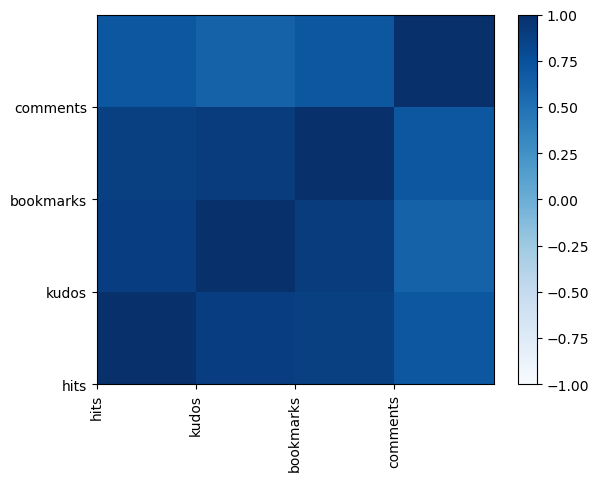

In [2]:
# Analyzing the Correlation Between Different Measures of Popularity

col_keep = ["hits", "kudos", "comments", "bookmarks"]

corr_data = data.copy(deep= True)

for col in corr_data.columns:
    if col not in col_keep:
        corr_data.drop(columns=[col], inplace = True)
        
corr_data = corr_data.corr()

heatmap = plt.pcolor(corr_data, cmap=plt.cm.Blues, vmin = -1, vmax = 1)
ticks = [x for x in range(0, len(corr_data.columns))]
labels = [x for x in corr_data.columns]
plt.xticks(ticks = ticks, labels = labels, rotation = 90)
plt.yticks(ticks = ticks, labels = labels)
# plot the legend on the side
plt.colorbar(heatmap)

### Languages

In [7]:
lang = data.groupby('LanguageName').count()
print(lang['language'])
print()
print('Number of unique languages in data set:',len(lang))
print()
print('Number of entries in data set:',len(data))
print()
# for i in range(len(lang['id'])):
#     print(lang.iloc[i],'is', str(lang['id'][i]/len(useful_data))+'% of the total.' )
# for L in lang['id'].index:
for i in range(len(lang['language'].index)):
    perc = round(lang['language'][i]/len(data),3)*100
    if perc >= 0.1:
        print(lang['language'].index[i], 'makes up', str(perc) + '% of the total data.')
    else:
        print(lang['language'].index[i], 'makes up less than 0.1% of the total data.')

LanguageName
Bahasa Indonesia           12
Dansk                       2
Deutsch                    91
English                 93117
Español                   221
Esperanto                   3
Français                   52
Gàidhlig                    1
Italiano                    6
Lingua latina               2
Magyar                      1
Nederlands                 10
Polski                     11
Português brasileiro       62
Suomi                       2
Svenska                     7
Tiếng Việt                  1
Čeština                     8
Русский                    77
中文                         30
Name: language, dtype: int64

Number of unique languages in data set: 20

Number of entries in data set: 93720

Bahasa Indonesia makes up less than 0.1% of the total data.
Dansk makes up less than 0.1% of the total data.
Deutsch makes up 0.1% of the total data.
English makes up 99.4% of the total data.
Español makes up 0.2% of the total data.
Esperanto makes up less than 0.1% of the t

### Summary Statistics

The summary statistics we will provide are:

    number of fanfics in the data set
    average word count
    % of fics finished
    number of fics for each rating
    average number of hits
    average number of kudos
    average number of comments
    average number of bookmarks

In [13]:
# Number of fanfics in the dataset
num_fanfics = len(data)

# Average word count
avg_word_count = data['words'].mean()

# Percentage of fics finished
percent_finished = (data['finished'].sum() / num_fanfics) * 100

# Number of fics for each rating
rating_counts = data['rating'].value_counts()

# Average number of hits
avg_hits = data['hits'].mean()

# Average number of kudos
avg_kudos = data['kudos'].mean()

# Average number of comments
avg_comments = data['comments'].mean()

# Average number of bookmarks
avg_bookmarks = data['bookmarks'].mean()

# Print summary statistics
print("Summary Statistics")
print(f"- Number of fanfics in the dataset: {num_fanfics}")
print(f"- Average word count: {avg_word_count:.2f}")
print(f"- Percentage of fics finished: {percent_finished:.2f}%")
print("- Number of fics for each rating:")
print(rating_counts)
print(f"- Average number of hits: {avg_hits:.2f}")
print(f"- Average number of kudos: {avg_kudos:.2f}")
print(f"- Average number of comments: {avg_comments:.2f}")
print(f"- Average number of bookmarks: {avg_bookmarks:.2f}")

Summary Statistics
- Number of fanfics in the dataset: 93720
- Average word count: 3723.91
- Percentage of fics finished: 94.79%
- Number of fics for each rating:
rating
 0.0    31606
 1.0    27497
 3.0    17484
 2.0    14347
-1.0     2786
Name: count, dtype: int64
- Average number of hits: 1474.44
- Average number of kudos: 57.48
- Average number of comments: 3.96
- Average number of bookmarks: 8.84


### Are long fanfics more popular?
To answer this question we will create bar charts comparing the words in a fanfic to our four canidate measures of the popularity of a fanfic - kudos, comments, bookmarks, and hits. Then we will calculate the correlation coefficient between length and our measures of popularity.

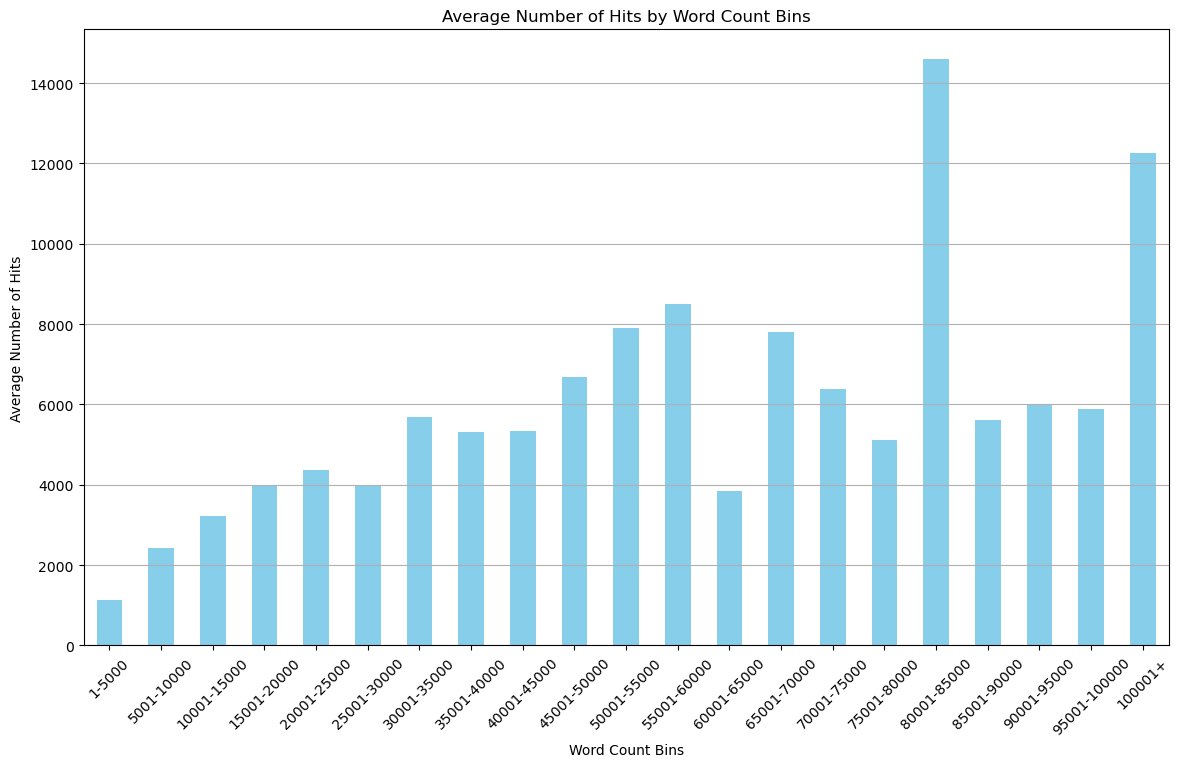

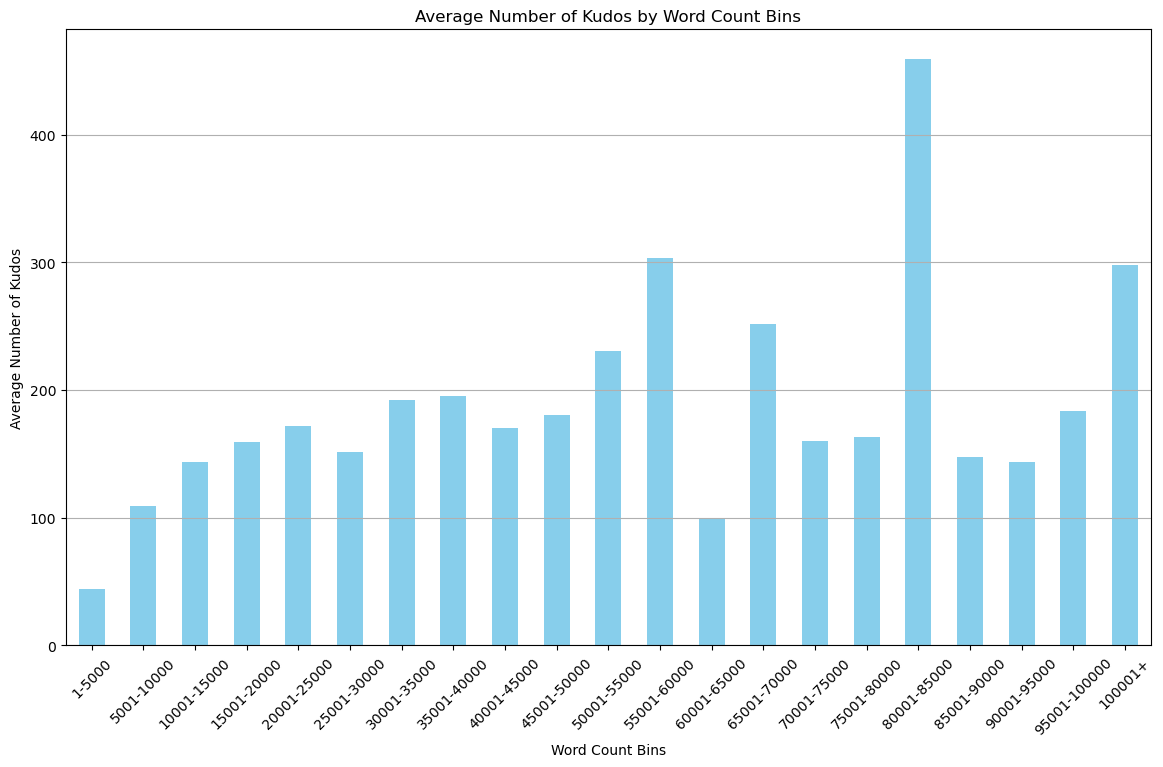

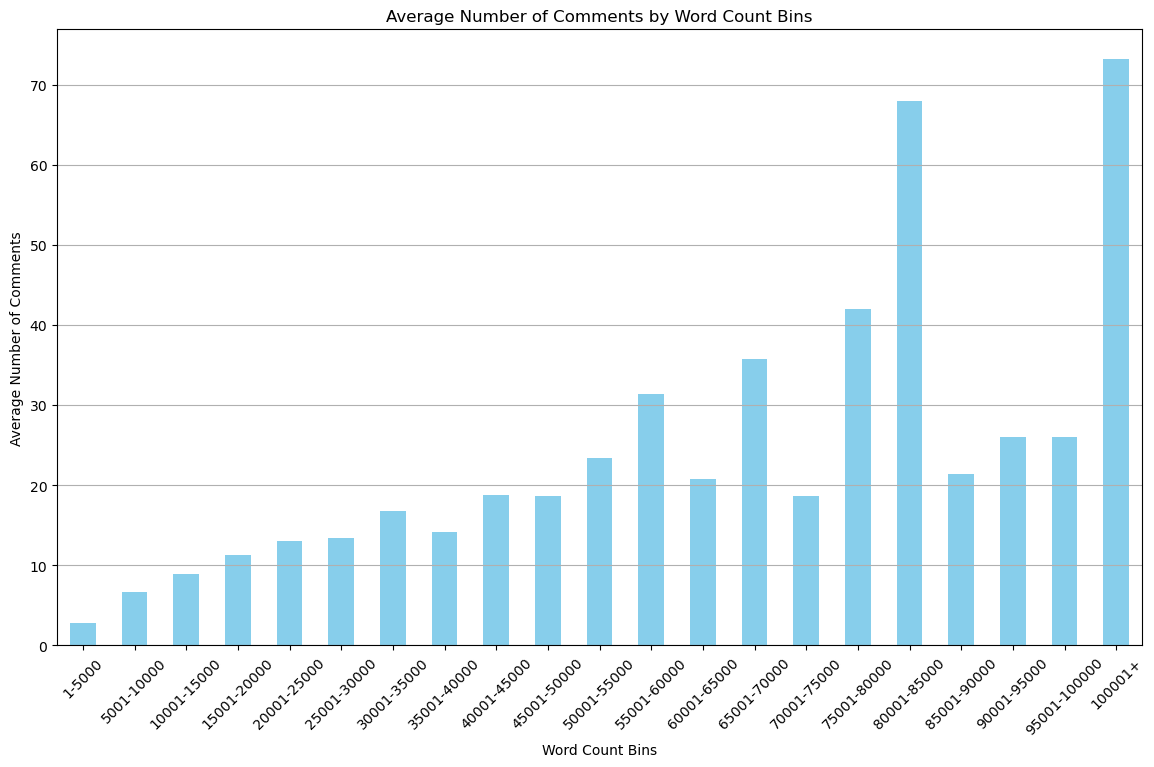

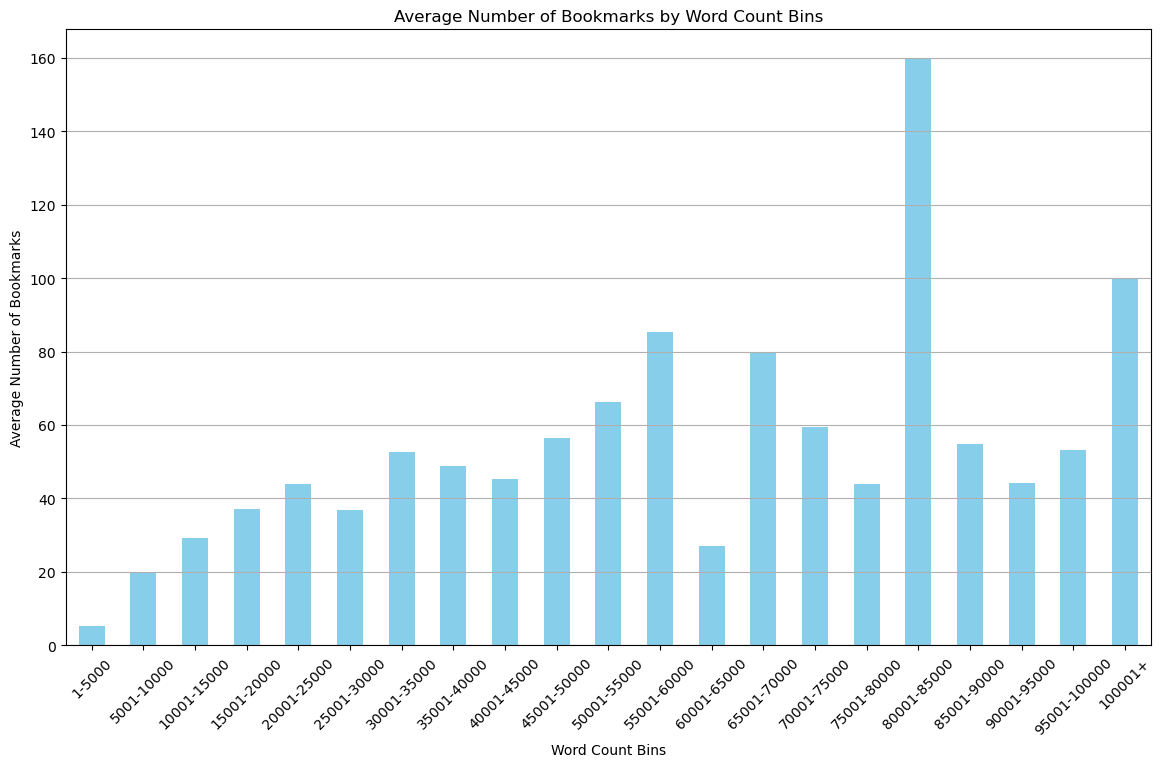

Pearson correlation coefficient (kudos): 0.12
P-value (kudos): 0.0000
Pearson correlation coefficient (comments): 0.30
P-value (comments): 0.0000
Pearson correlation coefficient (bookmarks): 0.15
P-value (bookmarks): 0.0000
Pearson correlation coefficient (hits): 0.17
P-value (hits): 0.0000


In [9]:
# Define the bins for word counts
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000, float('inf')]

# Create a new column in the DataFrame to represent the bin for each fanfic
data['word_bin'] = pd.cut(data['words'], bins=bins, labels=['1-5000', '5001-10000', '10001-15000', '15001-20000', '20001-25000', '25001-30000', '30001-35000', '35001-40000', '40001-45000', '45001-50000', '50001-55000', '55001-60000', '60001-65000', '65001-70000', '70001-75000', '75001-80000', '80001-85000', '85001-90000', '90001-95000', '95001-100000', '100001+'])

# Group the DataFrame by the word bins and calculate the average number of hits for each bin
average_hits_by_bin = data.groupby('word_bin')['hits'].mean()

# Plot the bar chart
plt.figure(figsize=(14, 8))
average_hits_by_bin.plot(kind='bar', color='skyblue')
plt.title('Average Number of Hits by Word Count Bins')
plt.xlabel('Word Count Bins')
plt.ylabel('Average Number of Hits')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Group the DataFrame by the word bins and calculate the average number of kudos for each bin
average_kudos_by_bin = data.groupby('word_bin')['kudos'].mean()

# Plot the bar chart
plt.figure(figsize=(14, 8))
average_kudos_by_bin.plot(kind='bar', color='skyblue')
plt.title('Average Number of Kudos by Word Count Bins')
plt.xlabel('Word Count Bins')
plt.ylabel('Average Number of Kudos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Group the DataFrame by the word bins and calculate the average number of comments for each bin
average_comments_by_bin = data.groupby('word_bin')['comments'].mean()

# Plot the bar chart
plt.figure(figsize=(14, 8))
average_comments_by_bin.plot(kind='bar', color='skyblue')
plt.title('Average Number of Comments by Word Count Bins')
plt.xlabel('Word Count Bins')
plt.ylabel('Average Number of Comments')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Group the DataFrame by the word bins and calculate the average number of bookmarks for each bin
average_bookmarks_by_bin = data.groupby('word_bin')['bookmarks'].mean()

# Plot the bar chart
plt.figure(figsize=(14, 8))
average_bookmarks_by_bin.plot(kind='bar', color='skyblue')
plt.title('Average Number of Bookmarks by Word Count Bins')
plt.xlabel('Word Count Bins')
plt.ylabel('Average Number of Bookmarks')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Calculate Pearson correlation coefficient for kudos
corr_kudos, p_value_kudos = pearsonr(data['words'], data['kudos'])
print(f"Pearson correlation coefficient (kudos): {corr_kudos:.2f}")
print(f"P-value (kudos): {p_value_kudos:.4f}")

# Calculate Pearson correlation coefficient for comments
corr_comments, p_value_comments = pearsonr(data['words'], data['comments'])
print(f"Pearson correlation coefficient (comments): {corr_comments:.2f}")
print(f"P-value (comments): {p_value_comments:.4f}")

# Calculate Pearson correlation coefficient and for bookmarks
corr_bookmarks, p_value_bookmarks = pearsonr(data['words'], data['bookmarks'])
print(f"Pearson correlation coefficient (bookmarks): {corr_bookmarks:.2f}")
print(f"P-value (bookmarks): {p_value_bookmarks:.4f}")

# Calculate Pearson correlation coefficient and for hits
corr_hits, p_value_hits = pearsonr(data['words'], data['hits'])
print(f"Pearson correlation coefficient (hits): {corr_hits:.2f}")
print(f"P-value (hits): {p_value_hits:.4f}")


### Are explicit fanfics more popular?
To answer this question we will create bar charts comparing a fanfic's rating to our four canidate measures of popularity - hits, kudos, comments, and bookmarks. We will then report if the differences in average popularity between ratings are statistically significant.

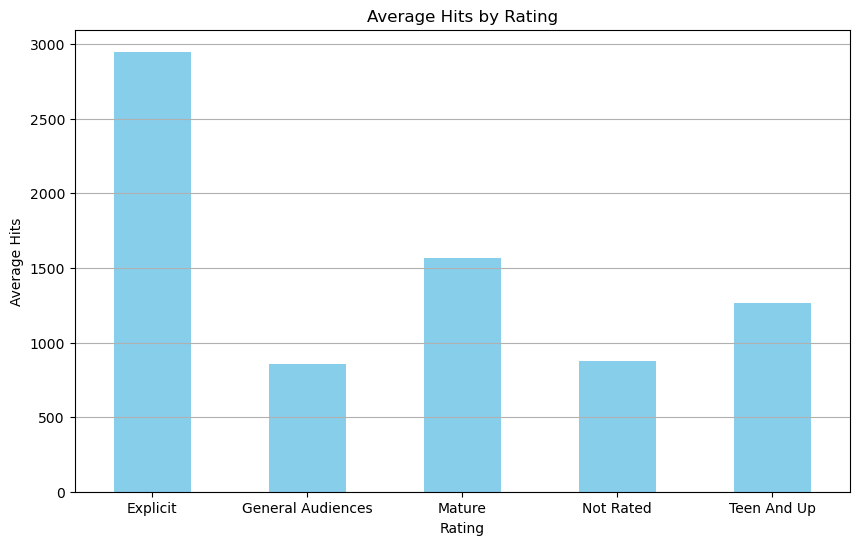

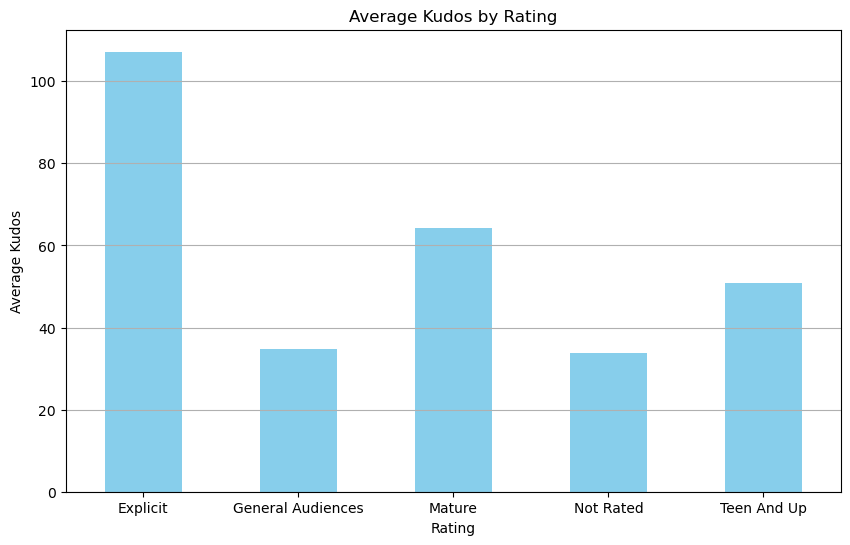

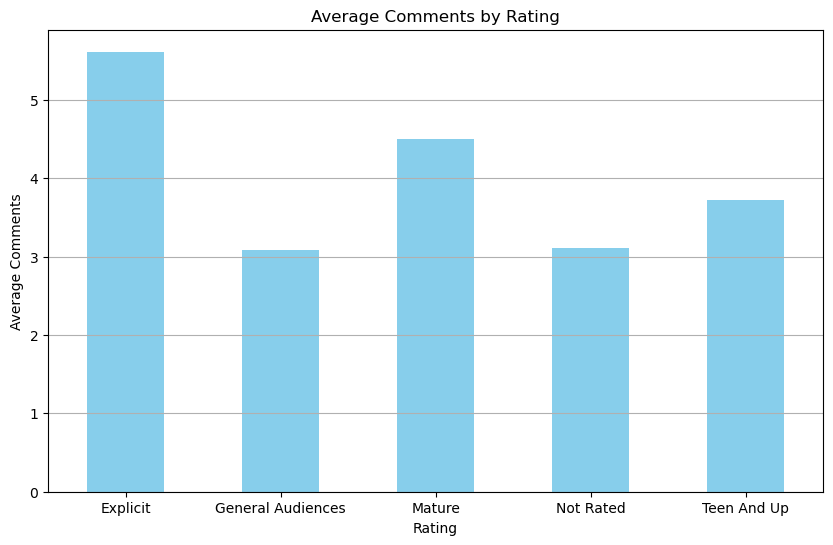

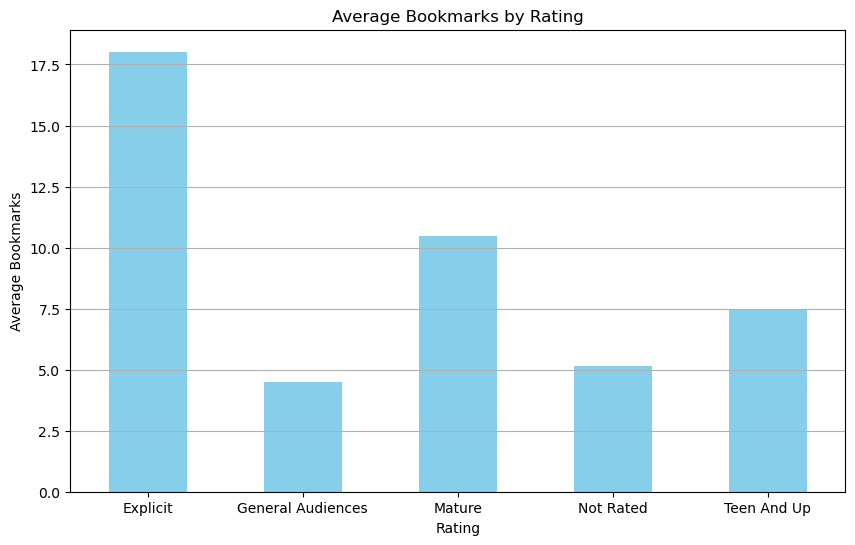

In [10]:
# Group the DataFrame by rating and calculate the average popularity metrics for each rating
average_popularity_by_rating = data.groupby('RatingName').agg({'hits': 'mean', 'kudos': 'mean', 'comments': 'mean', 'bookmarks': 'mean'})

# Plot the bar charts for each popularity metric
metrics = ['hits', 'kudos', 'comments', 'bookmarks']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    average_popularity_by_rating[metric].plot(kind='bar', color='skyblue')
    plt.title(f'Average {metric.capitalize()} by Rating')
    plt.xlabel('Rating')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()


In [11]:
# Perform t-test to compare the average popularity metrics between different ratings
for metric in metrics:
    print(f"\nT-test results for {metric.capitalize()}:\n")
    for i in range(len(average_popularity_by_rating.index)):
        for j in range(i+1, len(average_popularity_by_rating.index)):
            rating1 = average_popularity_by_rating.index[i]
            rating2 = average_popularity_by_rating.index[j]
            avg1 = data[data['RatingName'] == rating1][metric]
            avg2 = data[data['RatingName'] == rating2][metric]
            t_statistic, p_value = ttest_ind(avg1, avg2)
            print(f"T-test between ratings {rating1} and {rating2}:")
            print(f"  - T-statistic: {t_statistic:.2f}")
            print(f"  - P-value: {p_value:.4f}")
            if p_value < 0.05:
                print("  - Statistically significant difference (p < 0.05)")
            else:
                print("  - No statistically significant difference (p >= 0.05)")



T-test results for Hits:

T-test between ratings Explicit and General Audiences:
  - T-statistic: 41.36
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test between ratings Explicit and Mature:
  - T-statistic: 15.38
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test between ratings Explicit and Not Rated:
  - T-statistic: 12.60
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test between ratings Explicit and Teen And Up:
  - T-statistic: 29.51
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test between ratings General Audiences and Mature:
  - T-statistic: -16.71
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test between ratings General Audiences and Not Rated:
  - T-statistic: -0.50
  - P-value: 0.6178
  - No statistically significant difference (p >= 0.05)
T-test between ratings General Audiences and Teen And Up:
  - T-statistic: -19.66
  - P-value:

### Are finished works more popular?
To answer this question we will compare the average popularity of finished v. unfinished fanfictions for each of the four candidate measures of popularity, and report on whether the differences are statistically significant.

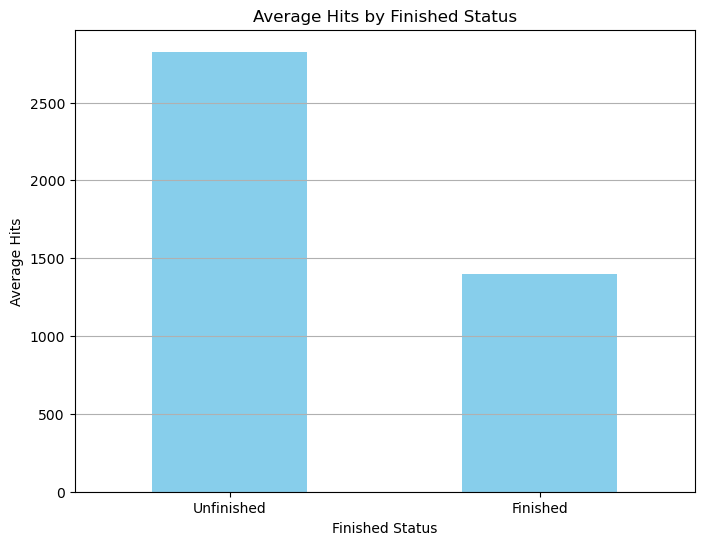

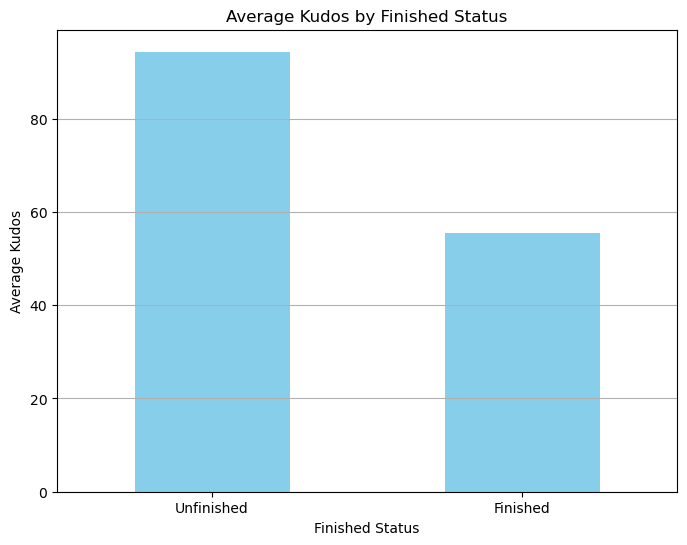

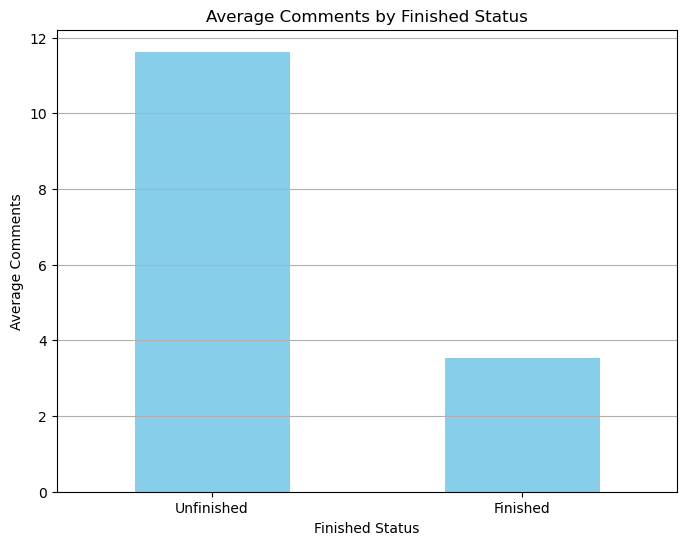

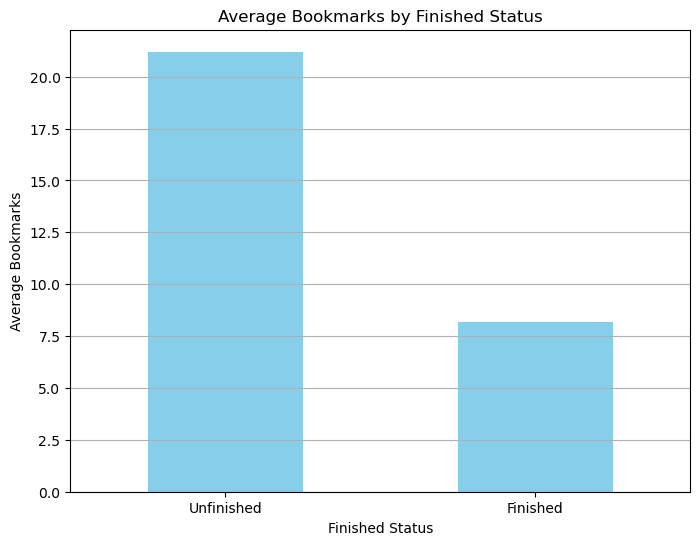

T-test results:
T-test for Hits:
  - T-statistic: 18.95
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test for Kudos:
  - T-statistic: 11.29
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test for Comments:
  - T-statistic: 35.63
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test for Bookmarks:
  - T-statistic: 15.76
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)


In [12]:
# Group the DataFrame by "finished" column and calculate the average popularity metrics for each group
average_popularity_by_finished = data.groupby('finished').agg({'hits': 'mean', 'kudos': 'mean', 'comments': 'mean', 'bookmarks': 'mean'})

# Plot bar charts comparing the average popularity of finished vs. unfinished fanfictions for each popularity metric
metrics = ['hits', 'kudos', 'comments', 'bookmarks']
for metric in metrics:
    plt.figure(figsize=(8, 6))
    average_popularity_by_finished[metric].plot(kind='bar', color='skyblue')
    plt.title(f'Average {metric.capitalize()} by Finished Status')
    plt.xlabel('Finished Status')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.xticks([1, 0], ['Finished', 'Unfinished'], rotation=0)  # Customize x-axis labels
    plt.grid(axis='y')
    plt.show()

# Perform t-test to compare the average popularity metrics between finished and unfinished fanfictions
print("T-test results:")
for metric in metrics:
    avg_finished = data[data['finished'] == 0][metric]
    avg_unfinished = data[data['finished'] == 1][metric]
    t_statistic, p_value = ttest_ind(avg_finished, avg_unfinished)
    print(f"T-test for {metric.capitalize()}:")
    print(f"  - T-statistic: {t_statistic:.2f}")
    print(f"  - P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  - Statistically significant difference (p < 0.05)")
    else:
        print("  - No statistically significant difference (p >= 0.05)")


### Are English fanfics more popular?

To answer this question, we will create a bar chart comparing fanfics written in English with those written in some other language for all four metrics of popularity, and see if the differences in popularity are statistically significant.

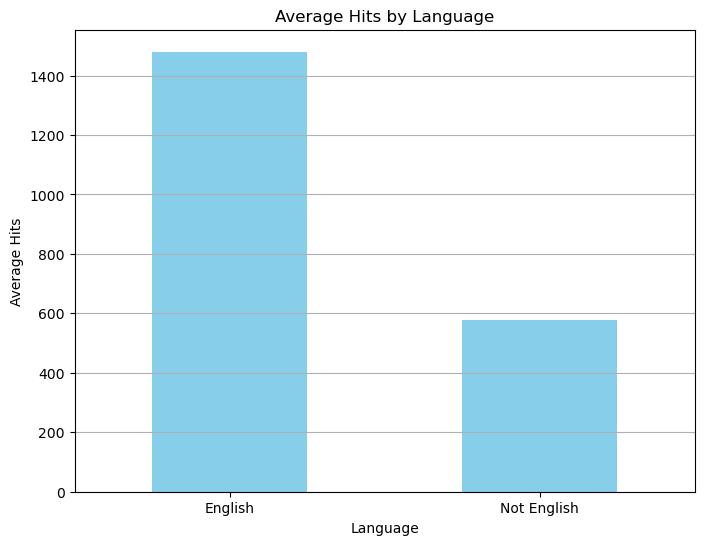

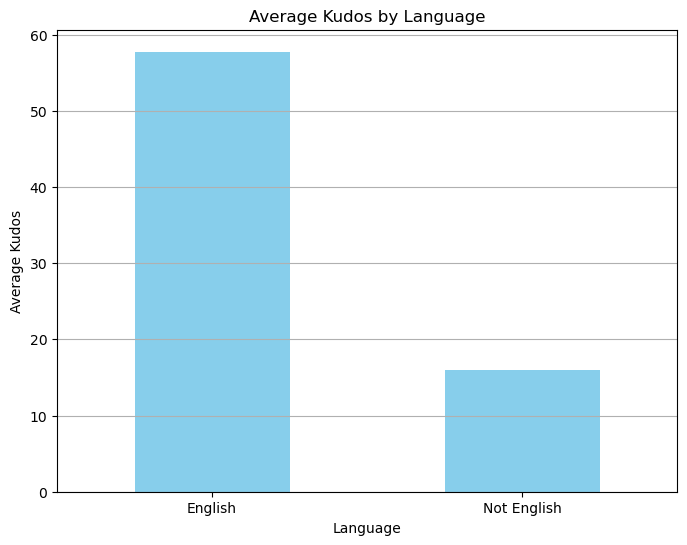

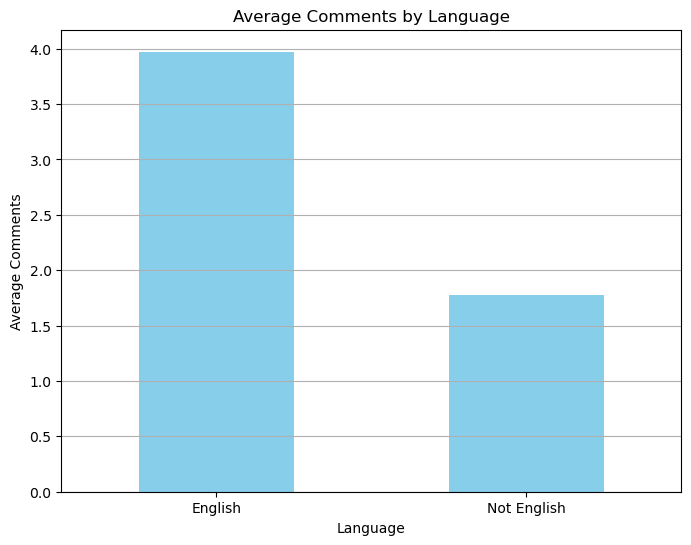

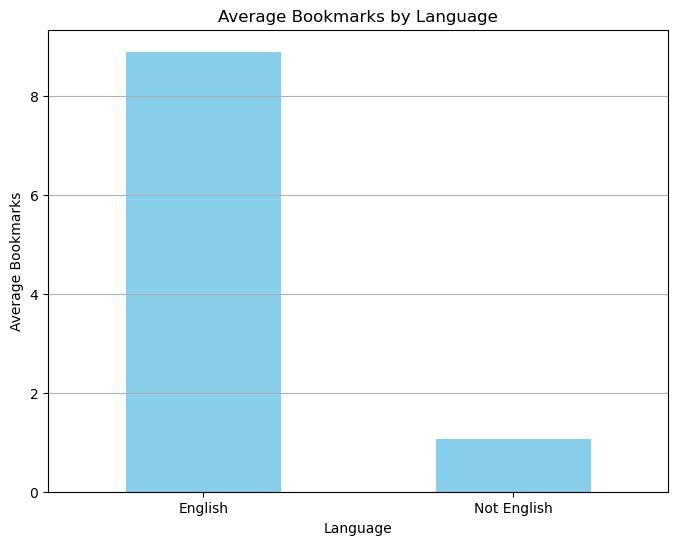

T-test results:
T-test for Hits:
  - T-statistic: 4.31
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test for Kudos:
  - T-statistic: 4.36
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test for Comments:
  - T-statistic: 3.45
  - P-value: 0.0006
  - Statistically significant difference (p < 0.05)
T-test for Bookmarks:
  - T-statistic: 3.40
  - P-value: 0.0007
  - Statistically significant difference (p < 0.05)


In [16]:
# Define a function to categorize languages as English or not English
def categorize_language(language):
    return 'English' if language == 'English' else 'Not English'

# Apply the function to create a new column for language categories
data['LanguageCategory'] = data['LanguageName'].apply(categorize_language)

# Group the DataFrame by "LanguageCategory" column and calculate the average popularity metrics for each group
average_popularity_by_language = data.groupby('LanguageCategory').agg({'hits': 'mean', 'kudos': 'mean', 'comments': 'mean', 'bookmarks': 'mean'})

# Plot bar charts comparing the average popularity of English vs. not English fanfictions for each popularity metric
metrics = ['hits', 'kudos', 'comments', 'bookmarks']
for metric in metrics:
    plt.figure(figsize=(8, 6))
    average_popularity_by_language[metric].plot(kind='bar', color='skyblue')
    plt.title(f'Average {metric.capitalize()} by Language')
    plt.xlabel('Language')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()

# Perform t-test to compare the average popularity metrics between English and not English fanfictions
print("T-test results:")
for metric in metrics:
    avg_english = data[data['LanguageCategory'] == 'English'][metric]
    avg_not_english = data[data['LanguageCategory'] != 'English'][metric]
    t_statistic, p_value = ttest_ind(avg_english, avg_not_english)
    print(f"T-test for {metric.capitalize()}:")
    print(f"  - T-statistic: {t_statistic:.2f}")
    print(f"  - P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  - Statistically significant difference (p < 0.05)")
    else:
        print("  - No statistically significant difference (p >= 0.05)")


### How popular are the most popular works?
To answer this question, we will calculate what percentage of the total number of hits, kudos, comments, and bookmarks the most popular 1%, 5%, and 10% of fics receive.

In [18]:
# Calculate the total hits, kudos, comments, and bookmarks
total_hits = data['hits'].sum()
total_kudos = data['kudos'].sum()
total_comments = data['comments'].sum()
total_bookmarks = data['bookmarks'].sum()

# Sort the data by hits, kudos, comments, and bookmarks in descending order
sorted_data_hits = data.sort_values(by='hits', ascending=False)
sorted_data_kudos = data.sort_values(by='kudos', ascending=False)
sorted_data_comments = data.sort_values(by='comments', ascending=False)
sorted_data_bookmarks = data.sort_values(by='bookmarks', ascending=False)

# Calculate the number of fanfics in the top 1%, 5%, and 10% based on hits, kudos, comments, and bookmarks
total_fics = len(data)
top_1_percent = int(total_fics * 0.01)
top_5_percent = int(total_fics * 0.05)
top_10_percent = int(total_fics * 0.10)

# Calculate the percentage of total hits, kudos, comments, and bookmarks received by the top 1%, 5%, and 10% of fanfics
percent_hits_top_1 = sorted_data_hits.head(top_1_percent)['hits'].sum() / total_hits * 100
percent_hits_top_5 = sorted_data_hits.head(top_5_percent)['hits'].sum() / total_hits * 100
percent_hits_top_10 = sorted_data_hits.head(top_10_percent)['hits'].sum() / total_hits * 100

percent_kudos_top_1 = sorted_data_kudos.head(top_1_percent)['kudos'].sum() / total_kudos * 100
percent_kudos_top_5 = sorted_data_kudos.head(top_5_percent)['kudos'].sum() / total_kudos * 100
percent_kudos_top_10 = sorted_data_kudos.head(top_10_percent)['kudos'].sum() / total_kudos * 100

percent_comments_top_1 = sorted_data_comments.head(top_1_percent)['comments'].sum() / total_comments * 100
percent_comments_top_5 = sorted_data_comments.head(top_5_percent)['comments'].sum() / total_comments * 100
percent_comments_top_10 = sorted_data_comments.head(top_10_percent)['comments'].sum() / total_comments * 100

percent_bookmarks_top_1 = sorted_data_bookmarks.head(top_1_percent)['bookmarks'].sum() / total_bookmarks * 100
percent_bookmarks_top_5 = sorted_data_bookmarks.head(top_5_percent)['bookmarks'].sum() / total_bookmarks * 100
percent_bookmarks_top_10 = sorted_data_bookmarks.head(top_10_percent)['bookmarks'].sum() / total_bookmarks * 100

# Print the results
print("Percentage of total hits received by the top 1%, 5%, and 10% of fanfics:")
print(f"- Top 1%: {percent_hits_top_1:.2f}%")
print(f"- Top 5%: {percent_hits_top_5:.2f}%")
print(f"- Top 10%: {percent_hits_top_10:.2f}%\n")

print("Percentage of total kudos received by the top 1%, 5%, and 10% of fanfics:")
print(f"- Top 1%: {percent_kudos_top_1:.2f}%")
print(f"- Top 5%: {percent_kudos_top_5:.2f}%")
print(f"- Top 10%: {percent_kudos_top_10:.2f}%\n")

print("Percentage of total comments received by the top 1%, 5%, and 10% of fanfics:")
print(f"- Top 1%: {percent_comments_top_1:.2f}%")
print(f"- Top 5%: {percent_comments_top_5:.2f}%")
print(f"- Top 10%: {percent_comments_top_10:.2f}%\n")

print("Percentage of total bookmarks received by the top 1%, 5%, and 10% of fanfics:")
print(f"- Top 1%: {percent_bookmarks_top_1:.2f}%")
print(f"- Top 5%: {percent_bookmarks_top_5:.2f}%")
print(f"- Top 10%: {percent_bookmarks_top_10:.2f}%")


Percentage of total hits received by the top 1%, 5%, and 10% of fanfics:
- Top 1%: 22.11%
- Top 5%: 42.15%
- Top 10%: 54.40%

Percentage of total kudos received by the top 1%, 5%, and 10% of fanfics:
- Top 1%: 27.29%
- Top 5%: 49.88%
- Top 10%: 62.56%

Percentage of total comments received by the top 1%, 5%, and 10% of fanfics:
- Top 1%: 23.74%
- Top 5%: 48.59%
- Top 10%: 63.77%

Percentage of total bookmarks received by the top 1%, 5%, and 10% of fanfics:
- Top 1%: 37.68%
- Top 5%: 61.82%
- Top 10%: 73.59%


## Schedule

- Week 4 (April 7th - April 13th): Figure out how to usefully analyze the text of each fan-work in the data set. Complete analysis of tags - their popularity, their use over time, etc.
- Week 5 (April 13th - April 19th): Complete readability analysis, comparing readability to popularity. Polish existing analysis and put into singular Jupyter notebook to submit. Perhaps expand current number of fics being analyzed for final analysis. Write up descriptions of what final data analysis finds.